Модель InceptionV3

Found 4400 images belonging to 5 classes.
Found 550 images belonging to 5 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.6851 - loss: 0.8318 
Epoch 1: val_accuracy improved from -inf to 0.89636, saving model to /content/drive/MyDrive/inceptionV3_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 2572s 18s/step - accuracy: 0.6861 - loss: 0.8294 - val_accuracy: 0.8964 - val_loss: 0.3112
Epoch 2/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9691 - loss: 0.0961
Epoch 2: val_accuracy improved from 0.89636 to 0.95273, saving model to /content/drive/MyDrive/inceptionV3_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.9691 - loss: 0.0960 - val_accuracy: 0.9527 - val_loss: 0.1491
Epoch 3/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9892 - loss: 0.0330
Epoch 3: val_accuracy did not improve from 0.95273
138/138 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9491 - val_loss: 0.1827
Epoch 4/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9931 - loss: 0.0266
Epoch 4: val_acc

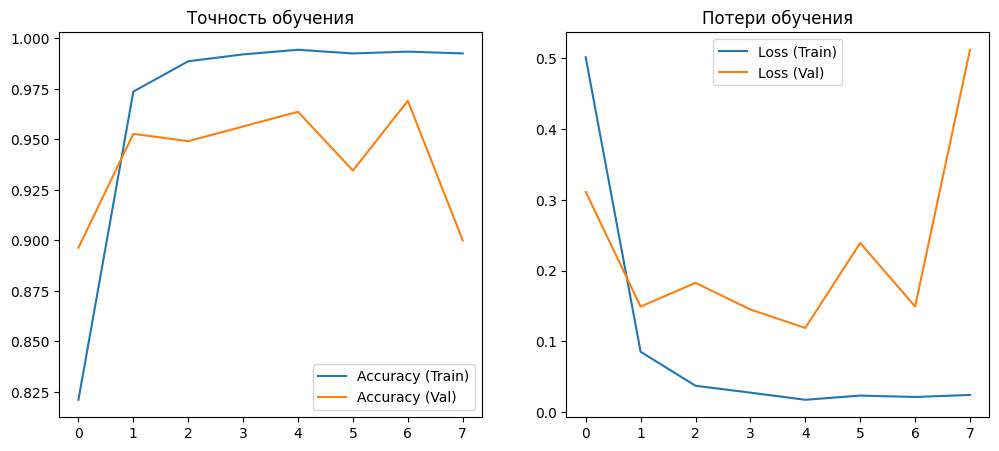

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# 1. Пути
base_path = '/content/drive/MyDrive/plant_dataset_split/'

# 2. Генераторы
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = datagen.flow_from_directory(base_path + 'train', target_size=(299, 299), batch_size=32, class_mode='categorical')
val_gen = datagen.flow_from_directory(base_path + 'val', target_size=(299, 299), batch_size=32, class_mode='categorical', shuffle=False)

# 3. Модель
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Сохранение (на новый Диск)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/inceptionV3_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 5. Обучение
history = model.fit(train_gen, validation_data=val_gen, epochs=12, callbacks=[checkpoint, early_stop])

# 6. ГРАФИКИ ДЛЯ ЗАЩИТЫ
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy (Train)')
plt.plot(epochs_range, val_acc, label='Accuracy (Val)')
plt.title('Точность обучения')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss (Train)')
plt.plot(epochs_range, val_loss, label='Loss (Val)')
plt.title('Потери обучения')
plt.legend()
plt.show()

Confusion Matrix - InceptionV3

18/18 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step


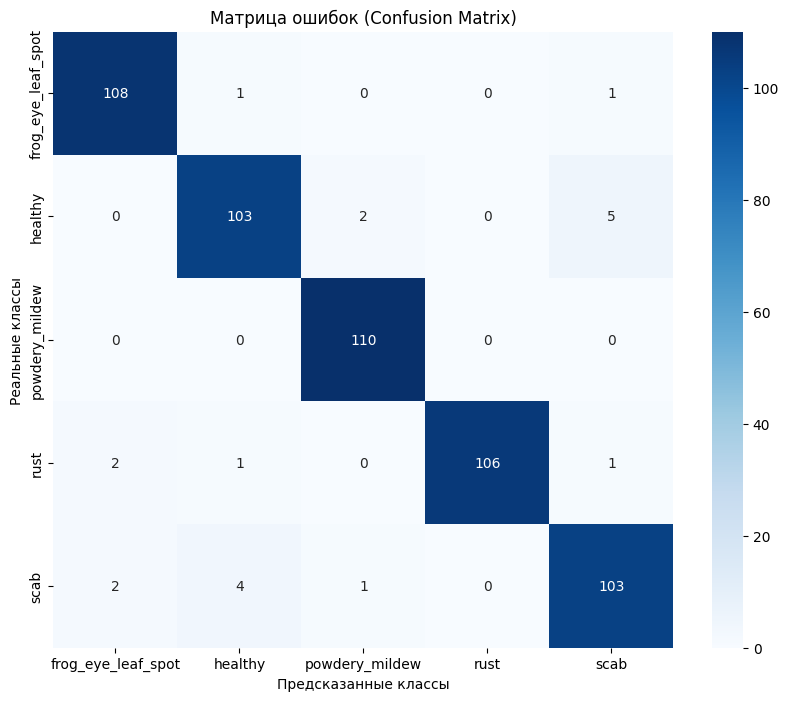

                    precision    recall  f1-score   support

frog_eye_leaf_spot       0.96      0.98      0.97       110
           healthy       0.94      0.94      0.94       110
    powdery_mildew       0.97      1.00      0.99       110
              rust       1.00      0.96      0.98       110
              scab       0.94      0.94      0.94       110

          accuracy                           0.96       550
         macro avg       0.96      0.96      0.96       550
      weighted avg       0.96      0.96      0.96       550



In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Получаем предсказания
val_gen.reset() # Сбрасываем генератор
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)

# 2. Строим матрицу ошибок
cm = confusion_matrix(val_gen.classes, y_pred)

# 3. Визуализируем
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(val_gen.class_indices.keys()),
            yticklabels=list(val_gen.class_indices.keys()))
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Реальные классы')
plt.xlabel('Предсказанные классы')
plt.show()

# 4. Печатаем текстовый отчет
print(classification_report(val_gen.classes, y_pred, target_names=list(val_gen.class_indices.keys())))

Модель ResNet50

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess

# 1. Специфичный генератор для ResNet
datagen_res = ImageDataGenerator(preprocessing_function=resnet_preprocess)

train_gen_res = datagen_res.flow_from_directory(base_path + 'train', target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen_res = datagen_res.flow_from_directory(base_path + 'val', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# 2. Архитектура ResNet50
base_model_res = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_res.trainable = True

model_res = models.Sequential([
    base_model_res,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])

model_res.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Сохранение под новым именем
checkpoint_res = ModelCheckpoint('/content/drive/MyDrive/resnet50_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# 4. Обучение
history_res = model_res.fit(train_gen_res, validation_data=val_gen_res, epochs=12, callbacks=[checkpoint_res, early_stop])

Found 4400 images belonging to 5 classes.
Found 550 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6987 - loss: 0.7708
Epoch 1: val_accuracy improved from -inf to 0.87455, saving model to /content/drive/MyDrive/resnet50_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 455s 3s/step - accuracy: 0.6997 - loss: 0.7687 - val_accuracy: 0.8745 - val_loss: 0.5716
Epoch 2/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9757 - loss: 0.0847
Epoch 2: val_accuracy improved from 0.87455 to 0.92000, saving model to /content/drive/MyDrive/resnet50_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.9757 - loss: 0.0846 - val_accuracy: 0.9200 - val_loss: 0.2418
Epoch 3/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9854 - loss: 0.0500
Epoch 3: val_accuracy improved from 0.92000 to 0.94364, saving model to /content/drive/MyDrive/resnet50_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.9854 - loss: 0.0499 - val_accuracy: 0.9436 - val_loss: 0.2346
Epoch 4/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/

Accuracy-loss of ResNet50

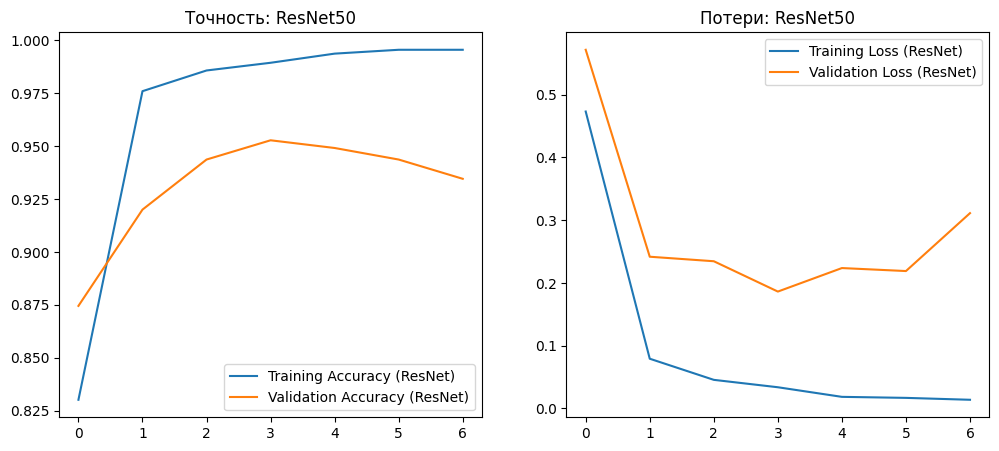


--- ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ (ResNet50) ---
18/18 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step
                    precision    recall  f1-score   support

frog_eye_leaf_spot       0.95      0.98      0.96       110
           healthy       0.92      0.97      0.95       110
    powdery_mildew       0.95      0.94      0.94       110
              rust       0.99      0.99      0.99       110
              scab       0.95      0.88      0.92       110

          accuracy                           0.95       550
         macro avg       0.95      0.95      0.95       550
      weighted avg       0.95      0.95      0.95       550


Соответствие индексов и названий:
{'frog_eye_leaf_spot': 0, 'healthy': 1, 'powdery_mildew': 2, 'rust': 3, 'scab': 4}


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Графики точности и потерь для ResNet50
acc_res = history_res.history['accuracy']
val_acc_res = history_res.history['val_accuracy']
loss_res = history_res.history['loss']
val_loss_res = history_res.history['val_loss']
epochs_range = range(len(acc_res))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_res, label='Training Accuracy (ResNet)')
plt.plot(epochs_range, val_acc_res, label='Validation Accuracy (ResNet)')
plt.title('Точность: ResNet50')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_res, label='Training Loss (ResNet)')
plt.plot(epochs_range, val_loss_res, label='Validation Loss (ResNet)')
plt.title('Потери: ResNet50')
plt.legend(loc='upper right')
plt.show()

# 2. Метрики и Матрица ошибок
print("\n--- ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ (ResNet50) ---")
val_gen_res.reset()
Y_pred_res = model_res.predict(val_gen_res)
y_pred_res = np.argmax(Y_pred_res, axis=1)

print(classification_report(val_gen_res.classes, y_pred_res, target_names=list(val_gen_res.class_indices.keys())))

# 3. Вывод меток классов
print("\nСоответствие индексов и названий:")
print(val_gen_res.class_indices)

Confusion Matrix- ResNet50

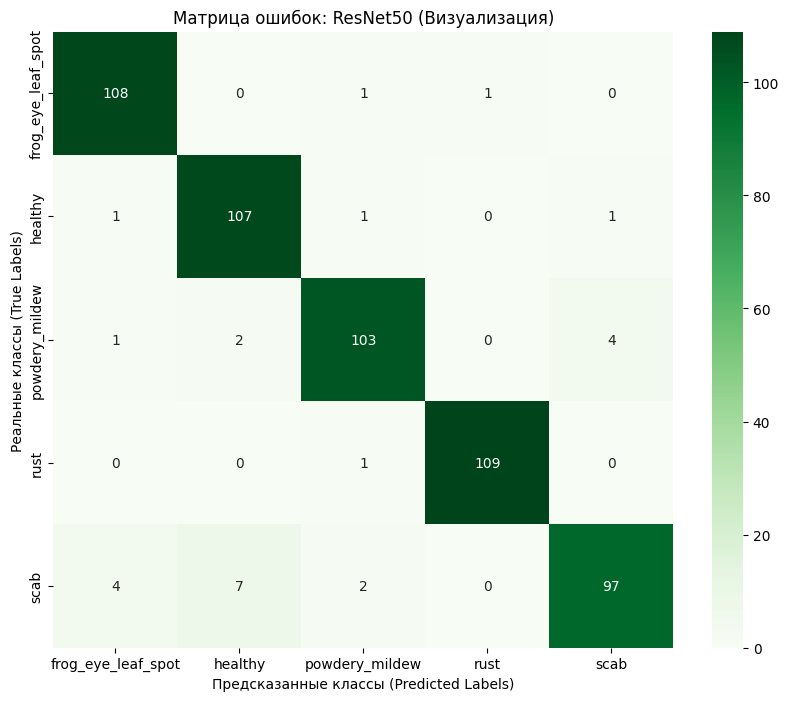

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Рассчитываем матрицу ошибок
cm_res = confusion_matrix(val_gen_res.classes, y_pred_res)

# 2. Настраиваем размер и стиль
plt.figure(figsize=(10, 8))
sns.heatmap(cm_res, annot=True, fmt='d', cmap='Greens',
            xticklabels=list(val_gen_res.class_indices.keys()),
            yticklabels=list(val_gen_res.class_indices.keys()))

plt.title('Матрица ошибок: ResNet50 (Визуализация)')
plt.ylabel('Реальные классы (True Labels)')
plt.xlabel('Предсказанные классы (Predicted Labels)')
plt.show()

Модель EfficientNet_B0

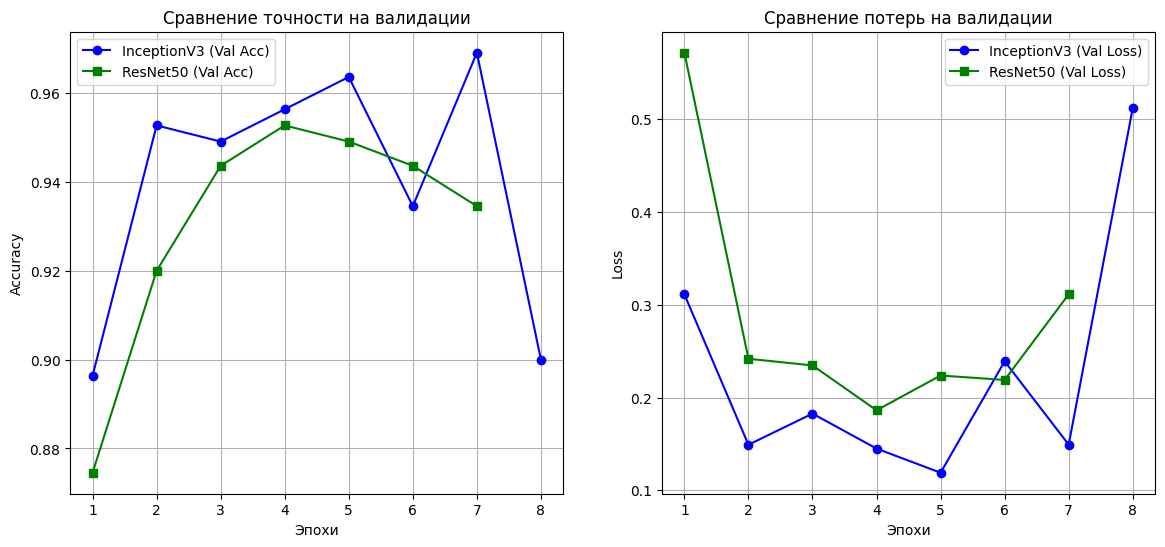


--- ИТОГОВАЯ ТАБЛИЦА СРАВНЕНИЯ ---
                 Метрика InceptionV3 ResNet50
   Лучшая точность (Val)      0.9691   0.9527
Минимальные потери (Val)      0.1190   0.1863
Кол-во эпох до остановки           8        7


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Собираем данные из обеих моделей
# InceptionV3
acc_inc = history.history['accuracy']
val_acc_inc = history.history['val_accuracy']
# ResNet50
acc_res = history_res.history['accuracy']
val_acc_res = history_res.history['val_accuracy']

epochs_inc = range(1, len(acc_inc) + 1)
epochs_res = range(1, len(acc_res) + 1)

# 2. Построение сравнительного графика точности
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_inc, val_acc_inc, 'b-o', label='InceptionV3 (Val Acc)')
plt.plot(epochs_res, val_acc_res, 'g-s', label='ResNet50 (Val Acc)')
plt.title('Сравнение точности на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 3. Построение сравнительного графика потерь
plt.subplot(1, 2, 2)
plt.plot(epochs_inc, history.history['val_loss'], 'b-o', label='InceptionV3 (Val Loss)')
plt.plot(epochs_res, history_res.history['val_loss'], 'g-s', label='ResNet50 (Val Loss)')
plt.title('Сравнение потерь на валидации')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# 4. Сводная таблица результатов
data = {
    'Метрика': ['Лучшая точность (Val)', 'Минимальные потери (Val)', 'Кол-во эпох до остановки'],
    'InceptionV3': [f"{max(val_acc_inc):.4f}", f"{min(history.history['val_loss']):.4f}", len(acc_inc)],
    'ResNet50': [f"{max(val_acc_res):.4f}", f"{min(history_res.history['val_loss']):.4f}", len(acc_res)]
}

df_compare = pd.DataFrame(data)
print("\n--- ИТОГОВАЯ ТАБЛИЦА СРАВНЕНИЯ ---")
print(df_compare.to_string(index=False))

In [7]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess

# 1. Генераторы данных специально для EfficientNet
datagen_eff = ImageDataGenerator(preprocessing_function=eff_preprocess)

train_gen_eff = datagen_eff.flow_from_directory(base_path + 'train', target_size=(224, 224), batch_size=32, class_mode='categorical')
val_gen_eff = datagen_eff.flow_from_directory(base_path + 'val', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# 2. Архитектура модели
base_model_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_eff.trainable = True # Разрешаем дообучение всей сети

model_eff = models.Sequential([
    base_model_eff,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])

model_eff.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Сохранение
checkpoint_eff = ModelCheckpoint('/content/drive/MyDrive/efficientnetB0_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# 4. Обучение
history_eff = model_eff.fit(train_gen_eff, validation_data=val_gen_eff, epochs=12, callbacks=[checkpoint_eff, early_stop])

Found 4400 images belonging to 5 classes.
Found 550 images belonging to 5 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5174 - loss: 1.2327
Epoch 1: val_accuracy improved from -inf to 0.83455, saving model to /content/drive/MyDrive/efficientnetB0_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.5186 - loss: 1.2303 - val_accuracy: 0.8345 - val_loss: 0.4413
Epoch 2/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8936 - loss: 0.3311
Epoch 2: val_accuracy improved from 0.83455 to 0.94909, saving model to /content/drive/MyDrive/efficientnetB0_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.8938 - loss: 0.3307 - val_accuracy: 0.9491 - val_loss: 0.1858
Epoch 3/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9500 - loss: 0.1528
Epoch 3: val_accuracy did not improve from 0.94909
138/138 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.9500 - loss: 0.1527 - val_accuracy: 0.9455 - val_loss: 0.1679
Epoch 4/12
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9798 - loss: 0.0826
Epoch 4: val_a

Comparison of val_accuracy and val_loss of 3 models: InceptionV3, ResNet50, EfficientNet_B0

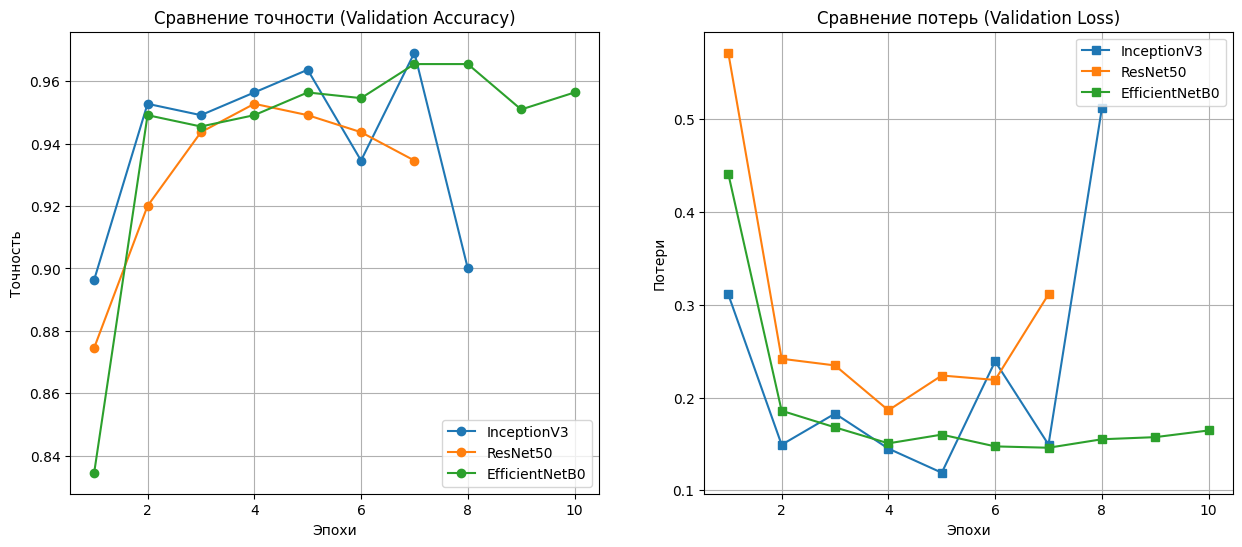


--- СТАТИСТИЧЕСКИЙ АНАЛИЗ ---
        Модель  Лучшая точность  Мин. потери  Эпох до остановки
   InceptionV3         0.969091     0.118998                  8
      ResNet50         0.952727     0.186284                  7
EfficientNetB0         0.965455     0.145923                 10


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Собираем данные
history_dict = {
    'InceptionV3': history.history,
    'ResNet50': history_res.history,
    'EfficientNetB0': history_eff.history
}

plt.figure(figsize=(15, 6))

# График точности (Validation Accuracy)
plt.subplot(1, 2, 1)
for name, hist in history_dict.items():
    epochs = range(1, len(hist['val_accuracy']) + 1)
    plt.plot(epochs, hist['val_accuracy'], '-o', label=f'{name}')
plt.title('Сравнение точности (Validation Accuracy)')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# График потерь (Validation Loss)
plt.subplot(1, 2, 2)
for name, hist in history_dict.items():
    epochs = range(1, len(hist['val_loss']) + 1)
    plt.plot(epochs, hist['val_loss'], '-s', label=f'{name}')
plt.title('Сравнение потерь (Validation Loss)')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.show()

# Итоговая аналитическая таблица
results = []
for name, hist in history_dict.items():
    results.append({
        'Модель': name,
        'Лучшая точность': max(hist['val_accuracy']),
        'Мин. потери': min(hist['val_loss']),
        'Эпох до остановки': len(hist['val_accuracy'])
    })

df_results = pd.DataFrame(results)
print("\n--- СТАТИСТИЧЕСКИЙ АНАЛИЗ ---")
print(df_results.to_string(index=False))

Confision Matrix - EfficientNet_B0

18/18 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


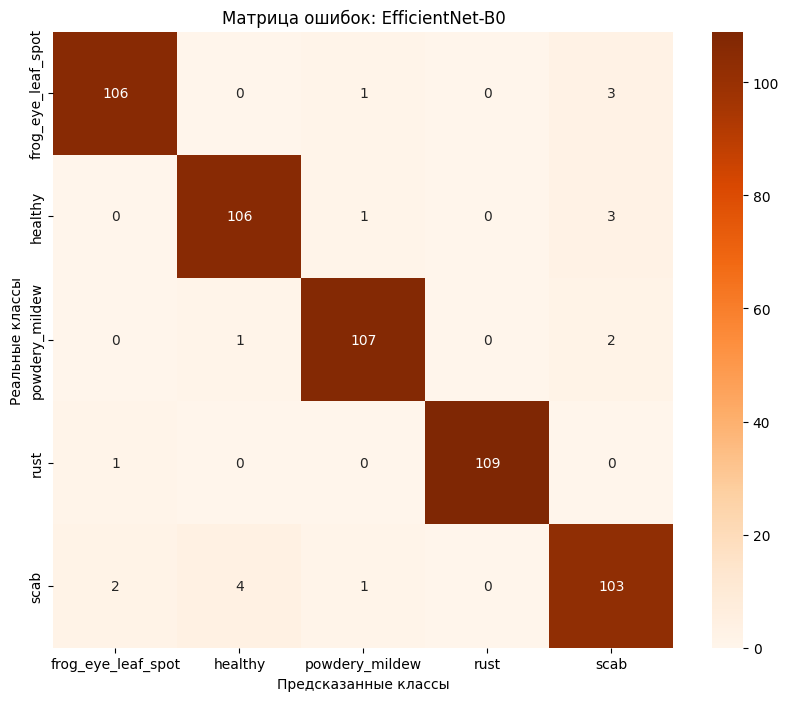


--- ДЕТАЛЬНЫЕ МЕТРИКИ EFFICIENTNET-B0 ---
                    precision    recall  f1-score   support

frog_eye_leaf_spot       0.97      0.96      0.97       110
           healthy       0.95      0.96      0.96       110
    powdery_mildew       0.97      0.97      0.97       110
              rust       1.00      0.99      1.00       110
              scab       0.93      0.94      0.93       110

          accuracy                           0.97       550
         macro avg       0.97      0.97      0.97       550
      weighted avg       0.97      0.97      0.97       550



In [9]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Получаем предсказания
val_gen_eff.reset()
Y_pred_eff = model_eff.predict(val_gen_eff)
y_pred_eff = np.argmax(Y_pred_eff, axis=1)

# 2. Матрица ошибок
cm_eff = confusion_matrix(val_gen_eff.classes, y_pred_eff)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_eff, annot=True, fmt='d', cmap='Oranges', # Оранжевый цвет для EfficientNet
            xticklabels=list(val_gen_eff.class_indices.keys()),
            yticklabels=list(val_gen_eff.class_indices.keys()))

plt.title('Матрица ошибок: EfficientNet-B0')
plt.ylabel('Реальные классы')
plt.xlabel('Предсказанные классы')
plt.show()

# 3. Детальные метрики (Precision, Recall, F1)
print("\n--- ДЕТАЛЬНЫЕ МЕТРИКИ EFFICIENTNET-B0 ---")
print(classification_report(val_gen_eff.classes, y_pred_eff,
                            target_names=list(val_gen_eff.class_indices.keys())))